In [85]:
import pandas as pd
import numpy as np
import missingno as msno

# Read in Training and Test CSV

In [86]:
train_str = pd.read_csv('../datasets/a5_str_no_dummy.csv')

In [87]:
train_nums = pd.read_csv('../datasets/a5_numerics.csv')

In [88]:
train_ord = pd.read_csv('../datasets/a5_ordinals.csv')

In [89]:
test = pd.read_csv('../datasets/a5_test1.csv')

### Concatenate Training CSVs

In [90]:
step_1 = pd.concat([train_str, train_nums], axis = 1, ignore_index = False)

In [91]:
train = pd.concat([step_1, train_ord], axis = 1, ignore_index = False)
train.drop(columns = ['Unnamed: 0', 'index'], inplace = True)

### accidentally copied saleprice in the concatenation three times. Had to pair it back

In [92]:
saleprice = train['saleprice']
saleprice = saleprice.iloc[:, 0] 

In [93]:
train.drop(columns = ['saleprice'], inplace = True)

In [94]:
train['saleprice'] = saleprice

In [95]:
train.columns

Index(['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type', 'id', 'lot_area', 'year_built',
       'year_remod/add', 'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'mo_sold', 'yr_sold', 'lot_frontage',
       'mas_vnr_area', 'garage_yr_blt', 'garage_cars', 'garage_area', 'ttl_sf',
       'ttl_bath', 'lot_shape', 'utilities', 'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical',
       'kitchen_qual', 'functional', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'overall_qual', 'overall_cond',
   

In [96]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,ttl_sf,ttl_bath
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,2948,2.0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,2,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,3934,2.0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,2,Lvl,...,0,NaN,NaN,NaN,0,9,2006,New,2150,3.5
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,1,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,1936,1.0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,2,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,2788,2.5


In [97]:
train.shape

(2048, 63)

In [98]:
test.shape

(878, 69)

In [99]:
train.columns

Index(['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type', 'id', 'lot_area', 'year_built',
       'year_remod/add', 'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'mo_sold', 'yr_sold', 'lot_frontage',
       'mas_vnr_area', 'garage_yr_blt', 'garage_cars', 'garage_area', 'ttl_sf',
       'ttl_bath', 'lot_shape', 'utilities', 'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical',
       'kitchen_qual', 'functional', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'overall_qual', 'overall_cond',
   

In [100]:
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2',
       'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'functional', 'fireplaces',
       'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish',
       'garage_cars', 'garage_area', 'garage_qual', 'garage_cond',
       'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc', 'fence',
       '

In [101]:
for item in test.columns:
    if item not in train.columns:
        test.drop(columns = [item], inplace = True)

In [102]:
test.shape

(878, 62)

In [103]:
train.shape

(2048, 63)

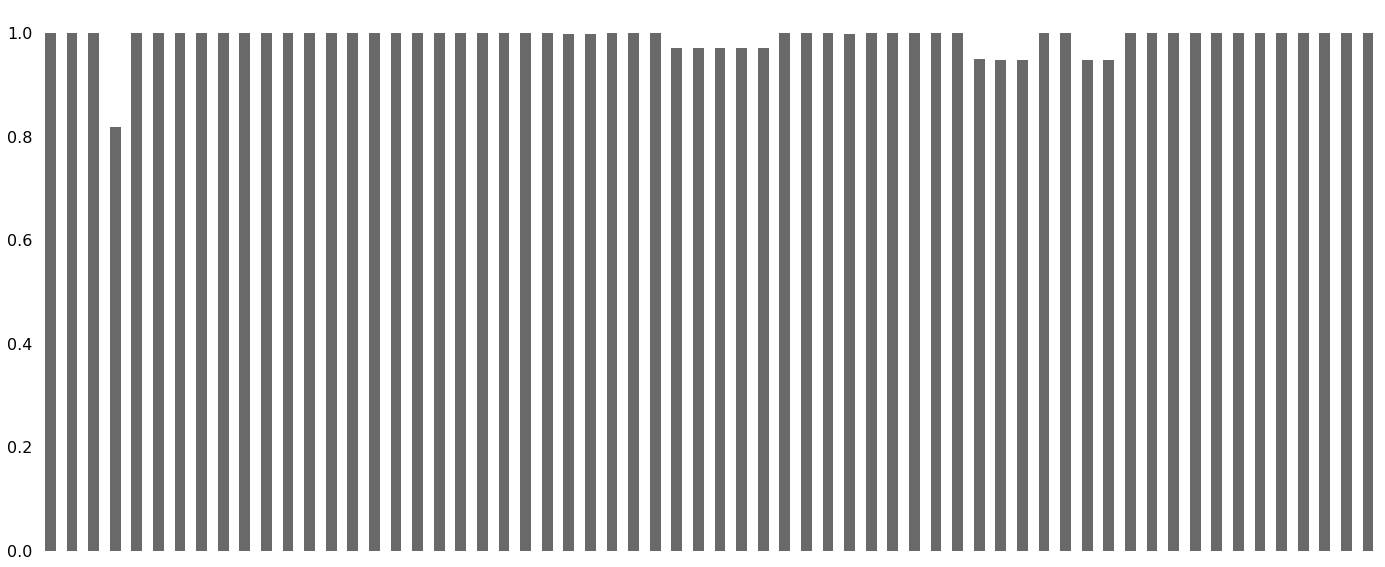

In [104]:
msno.bar(test)

### Changing ms_subclass to string object

In [106]:
test['ms_subclass'] = test['ms_subclass'].astype(str)

### fill test lot frontage with mode

In [107]:
test['lot_frontage'] = test['lot_frontage'].fillna(test['lot_frontage'].mean())

### fill NA's in garage type with 'None'

In [108]:
test['garage_type'] = test['garage_type'].fillna('None')

In [109]:
ordinal_strings = ['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'garage_finish',
 'garage_qual',
 'garage_cond']

In [110]:
for item in test.columns:
     if item in ordinal_strings:
            test[item].fillna('1', inplace = True)

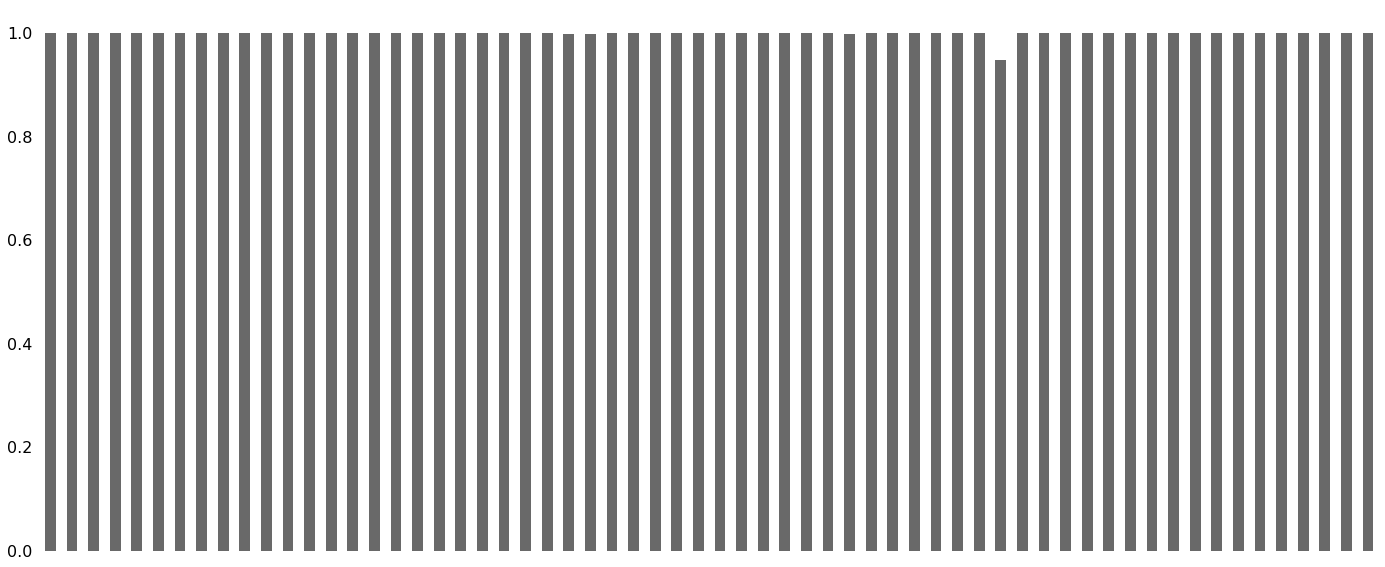

In [111]:
msno.bar(test)

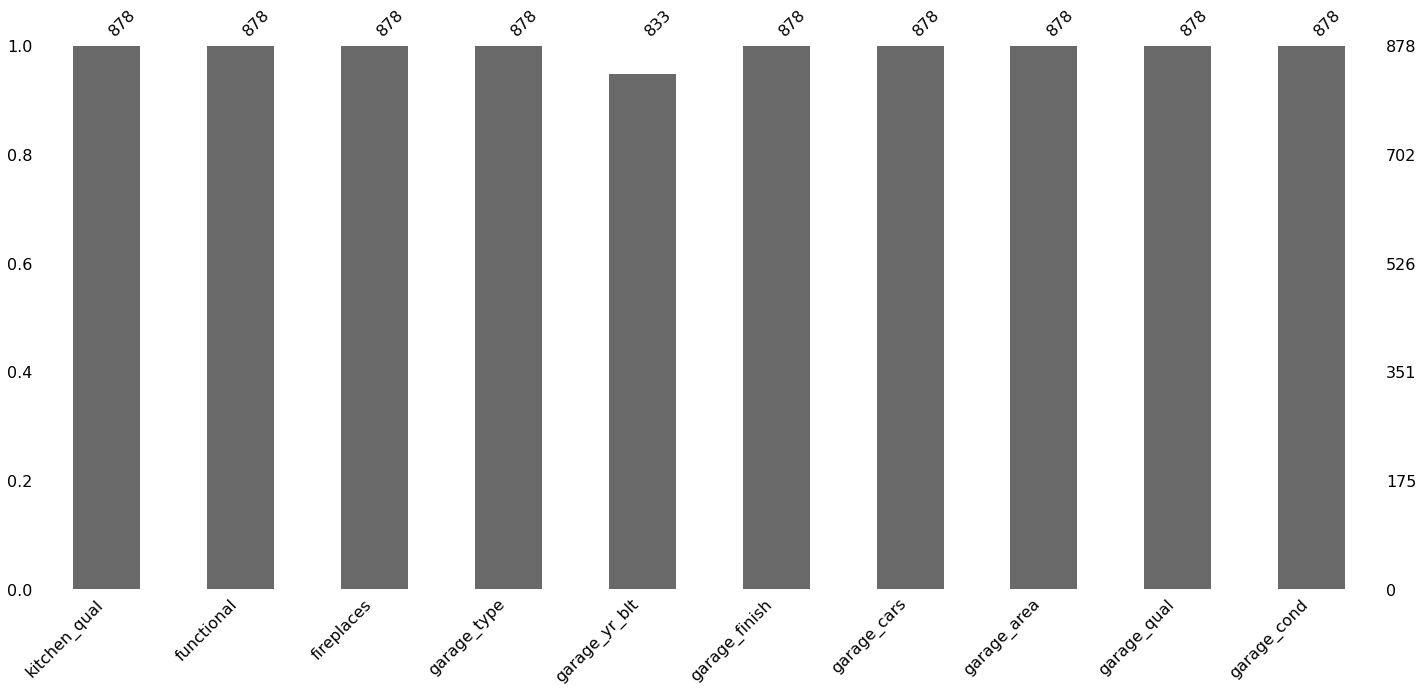

In [125]:
msno.bar(test.iloc[:,40:50])

### Drop Garage Year Built in both train and test

In [127]:
train.drop(columns = ['garage_yr_blt'], inplace = True)

In [128]:
test.drop(columns = ['garage_yr_blt'], inplace = True)

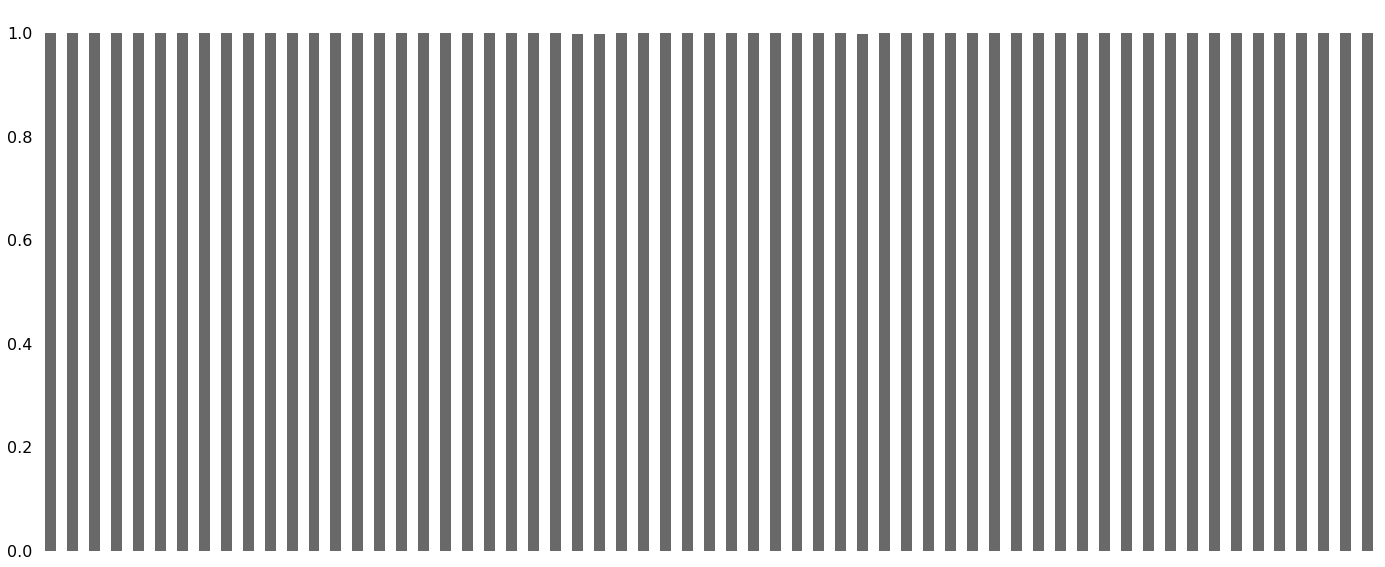

In [131]:
msno.bar(test);

In [132]:
def find_dtypes(df):
    #takes in a dataframe returns lists of columns with corresponding data types
    flt_list = []
    int_list = []
    str_list = []
    
    for item in df.columns:
        if df[item].dtypes == float:
            flt_list.append(item)
        if df[item].dtypes == int:
            int_list.append(item)
        if df[item].dtypes == object:
            str_list.append(item)
    print( f'FLOATS:',  flt_list)
    print( f'INTEGERS:',  int_list)
    print( f'STRINGS:',  str_list)

In [133]:
#calling function to return all datatypes for all columns
find_dtypes(test)

FLOATS: ['lot_frontage', 'mas_vnr_area', 'electrical', 'ttl_bath']
INTEGERS: ['id', 'lot_area', 'lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'functional', 'fireplaces', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'mo_sold', 'yr_sold', 'ttl_sf']
STRINGS: ['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'sale_type']


In [134]:
find_dtypes(train)

FLOATS: ['lot_frontage', 'mas_vnr_area', 'garage_cars', 'garage_area', 'ttl_sf', 'ttl_bath']
INTEGERS: ['ms_subclass', 'id', 'lot_area', 'year_built', 'year_remod/add', 'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'mo_sold', 'yr_sold', 'lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'overall_qual', 'overall_cond', 'saleprice']
STRINGS: ['ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'sale_type']


In [135]:
train_strings = ['ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'sale_type']

In [136]:
test_strings = ['ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'central_air', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'sale_type']

In [137]:
convert = []
for item in test_strings:
    if item not in train_strings:
        convert.append(item)

In [138]:
convert

['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'garage_finish',
 'garage_qual',
 'garage_cond']

In [139]:
for i in convert:
    test[i] = test[i].astype(int)

In [140]:
find_dtypes(test)

FLOATS: ['lot_frontage', 'mas_vnr_area', 'electrical', 'ttl_bath']
INTEGERS: ['id', 'lot_area', 'lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'functional', 'fireplaces', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'mo_sold', 'yr_sold', 'ttl_sf']
STRINGS: ['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'sale_type']


In [141]:
find_dtypes(train)

FLOATS: ['lot_frontage', 'mas_vnr_area', 'garage_cars', 'garage_area', 'ttl_sf', 'ttl_bath']
INTEGERS: ['ms_subclass', 'id', 'lot_area', 'year_built', 'year_remod/add', 'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'mo_sold', 'yr_sold', 'lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'overall_qual', 'overall_cond', 'saleprice']
STRINGS: ['ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'sale_type']


In [144]:
test.shape

(878, 179)

In [145]:
train.shape

(2048, 62)

# Dummify Test Set

In [142]:
test = pd.get_dummies(test, drop_first = True)

In [143]:
test.shape

(878, 179)

# Dummify Training Set

In [153]:
train = pd.get_dummies(train, drop_first = True)

In [154]:
train.shape

(2048, 174)

In [155]:
train_drops = []
for item in train.columns:
    if item not in test.columns and item != 'saleprice':
        train_drops.append(item)

In [156]:
train_drops

['ms_subclass',
 'ms_zoning_C (all)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition_2_Feedr',
 'condition_2_PosN',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'roof_matl_Membran',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'heating_OthW',
 'heating_Wall']

In [157]:
test_drops = []
for item in test.columns: 
    if item not in train.columns:
        test_drops.append(item)

In [158]:
test_drops

['ms_subclass_160',
 'ms_subclass_180',
 'ms_subclass_190',
 'ms_subclass_20',
 'ms_subclass_30',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_subclass_90',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_GasA',
 'sale_type_VWD']

In [159]:
test.drop(columns = test_drops, axis = 1, inplace = True)

In [160]:
train.drop(columns = train_drops, axis = 1, inplace =True)

In [161]:
test.shape

(878, 157)

In [162]:
train.shape

(2048, 158)

In [168]:
test.to_csv('../datasets/a5test_ready_4_model.csv', index = False)

In [169]:
train.to_csv('../datasets/a5train_ready_4_model.csv', index = False)